<a href="https://colab.research.google.com/github/NikMikM/MeasureAlgorithm/blob/master/choko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В данном ноутбуке будет произведена работа по заданию 1 курса *Машинное обучение для анализа данных*.

1) Зависимости и монтирование датасета



In [68]:
from google.colab import drive
drive.mount('/content/v', force_remount=True)
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns


Mounted at /content/v


In [69]:
mainDF = pd.read_csv('/content/v/MyDrive/Colab Notebooks/chocolate.csv')
mainDF.head()

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


2) Произведём предварительный разведывательный анализ данных таблицы:

In [70]:
mainDF.shape

(2224, 21)

In [71]:
mainDF.dtypes

Unnamed: 0                            int64
ref                                   int64
company                              object
company_location                     object
review_date                           int64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                       float64
rating                              float64
counts_of_ingredients                 int64
beans                                object
cocoa_butter                         object
vanilla                              object
lecithin                             object
salt                                 object
sugar                                object
sweetener_without_sugar              object
first_taste                          object
second_taste                         object
third_taste                          object
fourth_taste                         object
dtype: object

In [72]:
mainDF.isna().sum()

Unnamed: 0                             0
ref                                    0
company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

Мы видим, что в довольно большом колличестве данных отсутствует 4-й вкус. А также второй и третий. Прделагается убрать данные столбцы, а также столбец Unnamed.

In [ ]:
reductedDF = mainDF.copy()
reductedDF.drop('Unnamed: 0', inplace=True, axis=1)
reductedDF.drop('second_taste', inplace=True, axis=1)
reductedDF.drop('third_taste', inplace=True, axis=1)
reductedDF.drop('fourth_taste', inplace=True, axis=1)

3) Рассмотрим, какие типы данных получились в итоговой таблице

In [74]:
cat_cols = reductedDF.select_dtypes(include='object')
cat_cols.describe()

,company,company_location,country_of_bean_origin,specific_bean_origin_or_bar_name,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste
count,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224
unique,502,66,62,1398,1,2,2,2,2,2,2,456
top,Soma,U.S.A,Venezuela,Madagascar,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,creamy
freq,52,948,238,52,2224,1535,1876,1745,2187,2142,2148,160


In [75]:
num_cols = reductedDF.select_dtypes(include='number')
num_cols.describe()

,ref,review_date,cocoa_percent,rating,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000
mean,1337.010342,2013.857914,71.493930,3.198561,3.075989
std,693.959768,3.582151,5.278253,0.434329,0.929875
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,776.000000,2011.000000,70.000000,3.000000,2.000000
50%,1381.000000,2014.000000,70.000000,3.250000,3.000000
75%,1928.000000,2016.000000,74.000000,3.500000,4.000000
max,2490.000000,2020.000000,100.000000,4.000000,6.000000


Как мы видим, при выводе категориальных данных, у нас есть столбец 'bean', который содержит только одно значение для всех строк. Его можно опустить.

In [76]:
reductedDF.drop('beans', inplace=True, axis=1)

Теперь, когда у нас произведена предварительная обработка данных, можно приступать к анализу. Сначала закодируем категориальные данные

In [85]:
rdf = reductedDF.copy()
le = LabelEncoder()
for c in cat_cols.columns:
    rdf[c] = le.fit_transform(cat_cols[c])
      # print(c)
rdf.head()
print(16 // 4)
# cat_cols2 = rdf.select_dtypes(include='number')
# cat_cols2.describe()

4


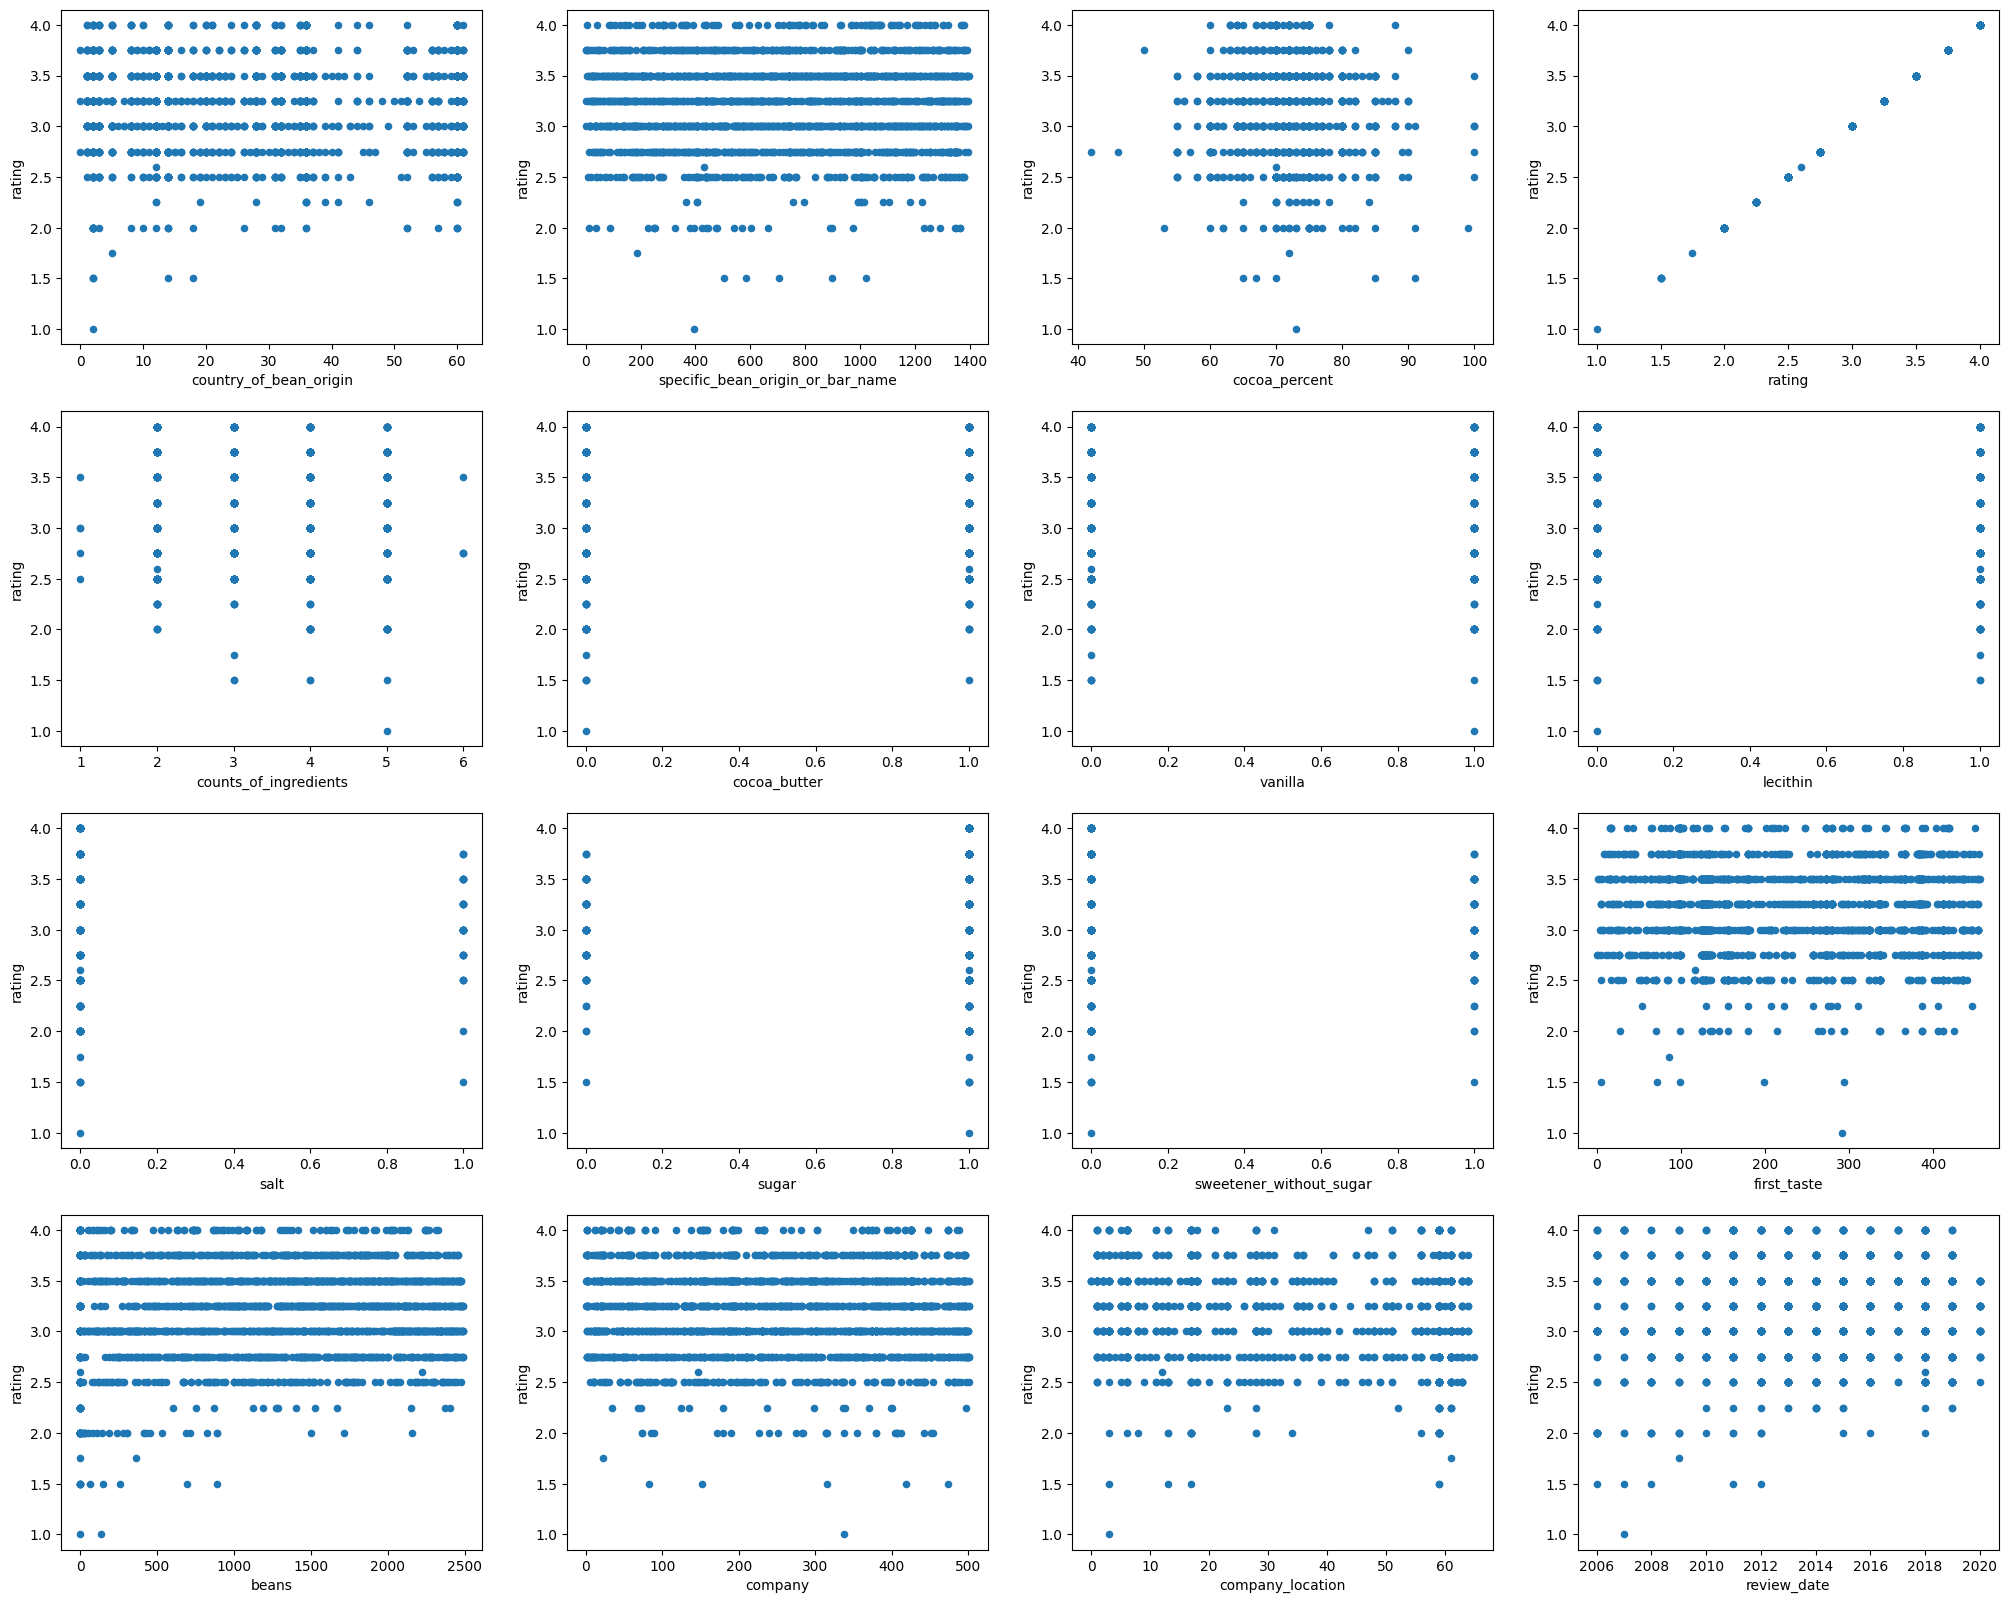

In [86]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))
for idx, feature in enumerate(rdf.columns):
    rdf.plot(feature, "rating", subplots=True, kind="scatter", ax=axes[idx // 4 - 1, idx % 4])

<Axes: xlabel='specific_bean_origin_or_bar_name', ylabel='Count'>

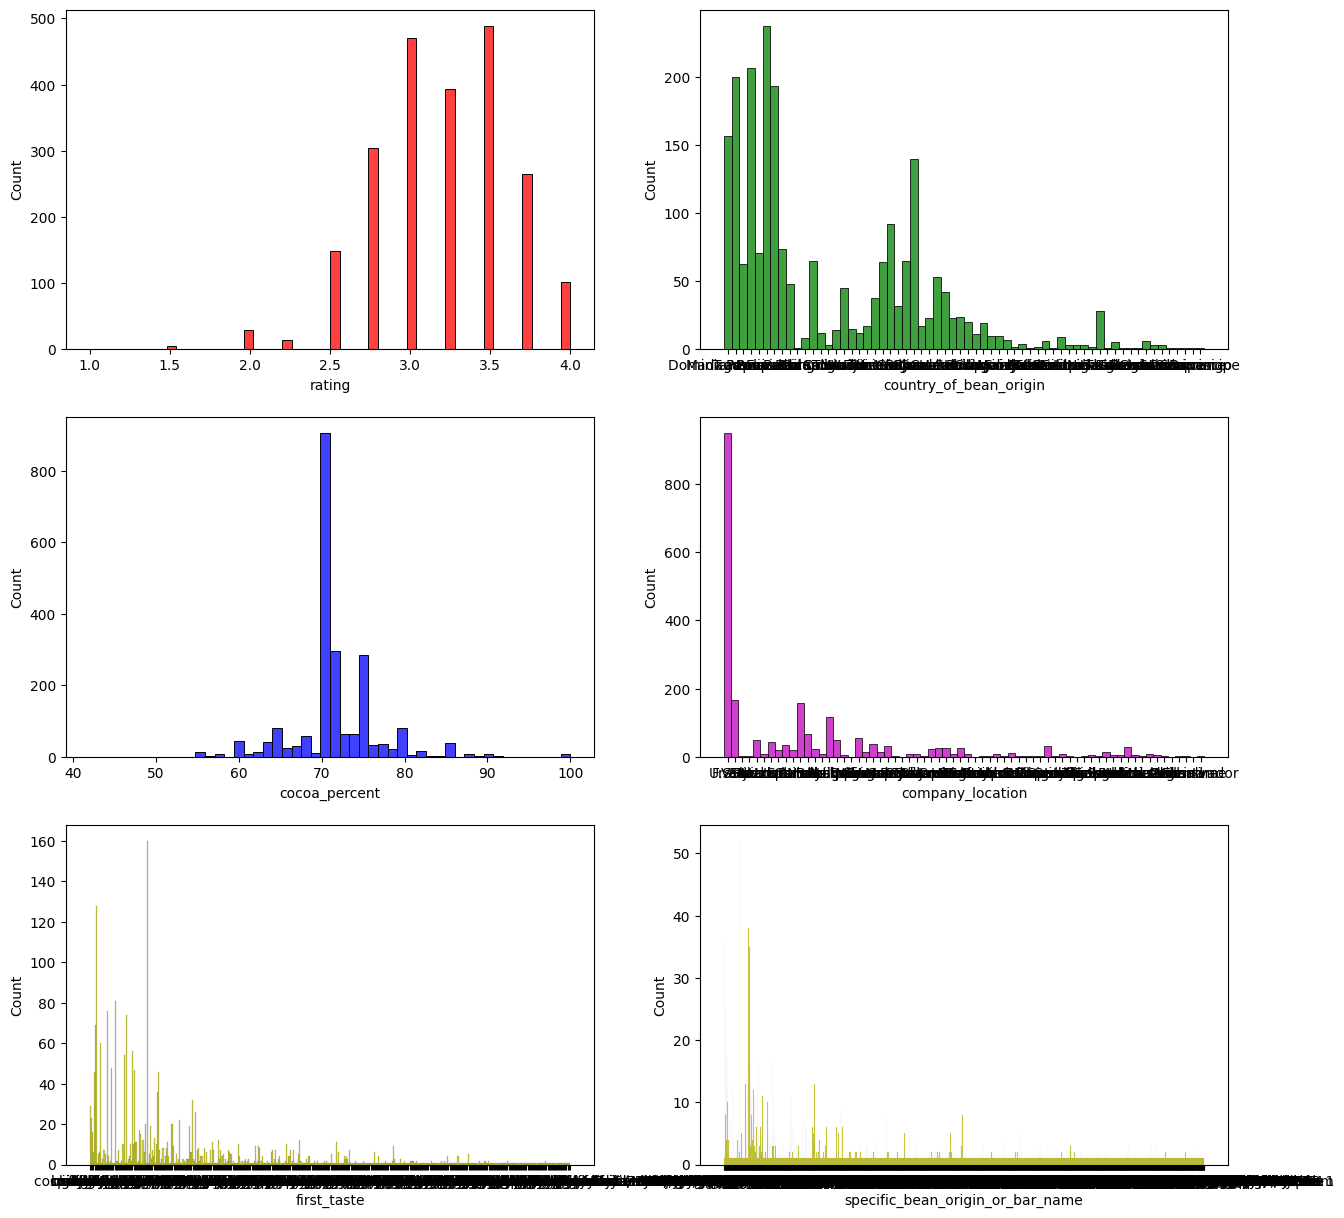

In [79]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(rdf['rating'], bins=50, color='r', ax=axes[0, 0])
sns.histplot(rdf['country_of_bean_origin'], bins=50, color='g', ax=axes[0, 1])
sns.histplot(rdf['cocoa_percent'], bins=50, color='b', ax=axes[1, 0])
sns.histplot(rdf['company_location'].dropna(), bins=50, color='m', ax=axes[1, 1])
sns.histplot(rdf['first_taste'], bins=50, color='y', ax=axes[2, 0])
sns.histplot(rdf['specific_bean_origin_or_bar_name'], bins=50, color='y', ax=axes[2, 1])